In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import hmean as secret_func

# The Language of Data Science

Meredith Miller

2018-02-23

# Motivation

* It is important that we have a common language with which to discuss data.
* Without it, miscommunication and confusion abound. With it, we can more effectively communicate and educate end users / clients.
* There are lots of subleties to the definitions of words among different fields and applications.
* However, data science is often seen as the overlap of computer science, mathematics & statistics, and business expertise, so the field is ripe for ambiguity.

![Venn Diagram of Data Science](data_science_diagram_2.png "Venn Diagram of Data Science")

For example, _precision_:

* Science & Engineering: the stability of a measurement when repeated many times; a measure of reproducibility and repeatability. For example: measure the height of a single person 5 times and compute how close the measurements are together to provide an error bound on the "true" height of that person.

* Statistics: generally agrees with the Science & Engineering usage, but statisticians prefer to speak in terms of "variability"; _precision_ can be formally defined as the reciprocal of the variance and is sometimes the preferred parameterization for certain statistical distributions. For example: measure the height of 5 people in a city and compute how close the measurements are together to provide an error bound on the "average" height of the population. 

* Mathematics & Computer Science: significant figures; the number of digits or bits that are used to express a value; the resolution of the representation. (This is _resolution_ in science & engineering fields.) For example, report that the height of a person is 63.13245838502283741 inches tall, a high precision number implying you had an instrument with __incredibly high resolution__.

* Binary classification: the fraction of relevant instances among the retrieved instances. For example: you are trying to find the number of documents mentioning a person's height; the _precision_ would be the number of documents your model claimed had a mention of height and was right, divided by the total number of documents your model claimed had a mention of height.

# Outline

1. Building Blocks -- how do we discuss numbers, the building blocks of data?
2. Tidy Data -- how do we discuss data as a whole? what are the "standards" in data science?
3. Dimensionality -- a topic that deserves special attention.
4. Basics of Analytic Vocabulary -- what is the basic vocabulary for analysis?

Getting Data (_Building Blocks_) >> Cleaning Data (_Tidy Data_) >> (A brief aside: _Dimensionality_) >> Analyzing Data (_Basics of Analytic Vocabulary_)

# Building Blocks

Let's start with the very basics. What is a number? A set? A random variable?

This will help us be precise (science & engineering definition) in our later descriptions.

## Types of Numbers

* Natural numbers, $\mathbb{N}$: The counting numbers {1, 2, 3, ...}; sometimes 0 is included.

* Integers, $\mathbb{Z}$: Positive and negative counting numbers, as well as zero.

* Rational numbers, $\mathbb{Q}$: Numbers that can be expressed as a fraction of an integer and a non-zero integer.

* Real numbers, $\mathbb{R}$: Numbers that have decimal representations, with either a finite or infinite sequence of digits to the right of the decimal point. They can be positive, negative, or zero.

* Irrational numbers, $\mathbb{I}$: Real numbers that are not rational.

![Number System](real-number-system.png "Number System")

Actually, there are lots of types of numbers, but these are the basics. See [Extensions of the Concept of Number](https://en.wikipedia.org/wiki/Number#Extensions_of_the_concept) if you want proof.

## Sets

* A _set_ is an unordered collection of distinct objects (i.e. no duplicates). The set is then considered an object itself, so you can have a set of sets.
* Why are we talking about this? Because:
    * SQL is deeply rooted in set theory, e.g. union, intersection, difference, etc. More information [here](https://medium.com/basecs/set-theory-the-method-to-database-madness-5ec4b4f05d79).
    * A set is a fundamental structure used extensively in math and statistics.

* Definitions:
    * Finite vs Infinite: a set is finite if you could count the elements and finish counting (at least, theoretically). Otherwise, the set is infinite.
    * Cardinality: number of elements of the set
* Examples:
    * {chrome, firefox, explorer} is a finite set of cardinality 3
    * $\mathbb{N}$ is the infinite set of integers

## Random Variables (RVs)

* A _random variable_ is a variable whose possible values are numerical outcomes of a random phenomenon.
* Why are we talking about this? Because:
    * You can't move an inch in statistics without talking about random variables.
    * "That's so random" is thrown around a lot with kids these days.

* Definitions:
    * Stochastic: equivalent of "random"
    * Continuous vs Discrete: 
        * A _discrete_ RV can only take on a countable number of distinct values.
        * A _continuous_ RV can take on an infinite number of possible values (an infinite set).
* Examples:
    * $X \sim \mathcal{N}(0,1)$ is a continuous RV distributed according to the standard Normal distribution.
    * $X \sim \mathrm{Poisson}(\lambda)$ is a discrete RV with a Poisson distribution, e.g. distribution underlying the count of cars to pass a point over an hour.

## All Together Now

$P(Y=y) = \begin{cases} \frac{1}{6} \text{, if } y \in \left\lbrace 1.4,2,3.6,4,5,6.77 \right\rbrace \\ 0 \text{, otherwise} \end{cases}$

$Y$ is a discrete RV with a sample space set of rational numbers with cardinality 6.

## Pop-Quiz

In the scenarios below, answer these 3 questions:
1. What did the speaker imply according to our definitions?
2. What do you think the speaker really meant? 
3. If you're right about #2, what should the speaker have said?

Scenarios:
1. We're talking about classifying types of device failures and someone says: "It shouldn't be too hard to hand-label the failures, there are really only a finite number of observations."
2. We're talking about estimating the number of buses needed to maintain a certain headway on a route and someone says: "The number of buses should be discrete, so be sure to round up your estimate."
3. We're chatting at lunch and someone says "Well $\pi$ is infinite, so I can't name all the digits."

# Data Types

Now, on top of those building blocks we add the higher-level concept of "data", exploring categorical, ordinal, and interval data in order from least to most structured.

Here again, we have subleties in definitions among different fields. Take binary data:

* Statistics: a categorical variable where the possible states are limited to two values. It is often used to represent one of two conceptually opposed values such as True/False or Yes/No.

* Computer Science / Database Administration: data represented in binary form (e.g. sequence of bytes); data or document that cannot be interpreted as text (e.g. "blob" format).

Note that while the fields use the term differently, they are both rooted in the idea of a bit being 0 or 1.

For all data types moving forward, we will be using the standard statistical interpretations. Note that we will not include characters (or strings) and datetimes as data types. We will discuss why in a later section.

## Categorical Data

* A variable where an observation belongs to one state (or "category") out of a finite set of states.
* While it might be represented numerically, it is traditionally considered _nominal_ data, meaning each number represents a qualitatively different value and cannot be compared numerically. You cannot use measures of central tendency -- they make no sense!
* For example, if you have a "browser" column with levels {chrome, firefox, explorer}, you could encode them as {1, 2, 3}, but 1 to 2 is not a difference of "1", it is strictly "chrome" to "firefox". Similarly, you can not take an "average" of the 3 browsers.
* Again, binary data is a special kind of categorical data where an observation can only take one of two values. (That is, the set of possible states has cardinality 2.)
* The states or categories are also sometimes referred to as "levels".
* Examples:
    * Blood type
    * Device facility
    * Bus manufacturer

## Ordinal Data

* A variable where an observation can be in one state out of a finite set of states, but the states have a ranked order.
* While the ranking order might be represented numerically, the intervals between ranks _cannot_ be assumed to be equal to the difference in values, so care must be taken to avoid faulty assumptions in analysis. Measures of central tendency may not be valid. 
* For example, say you have a ranked scale with "Dead", "Ill", "Healthy", and "Very Healthy". Is the difference between "Dead" and "Ill" the same as the difference between "Ill" and "Healthy"?
* Examples:
    * Likert scale (commonly seen on surveys: Strongly Agree to Strongly Disagree)
    * Pain score
    * "On a scale from 1 to 10..."

## Interval Data: Discrete

* A numeric variable that can only take values from a countable set (as in data realized from a discrete RV)
* The intervals between values _can_ be assumed to be equal to the difference in values, so standard measures of central tendency (e.g. mean, median, etc.) are appropriate.
* Examples:
    * Number of buses to arrive in an hour
    * Roll of a die
    * Celsius conversions from a thermometer that only reads Farenheit degrees on a coarse scale (Note that this is a somewhat contrived example of discrete but non-integer data. In reality, temperature is continuous and the discretization comes from the resolution of your instrument, which is true of any measurement.)

## Interval Data: Continuous

* A numeric variable that can take any value from the subset of real numbers, an infinite set.
* Of course, standard measures of central tendency are appropriate.
* As seen in the previous slide, we really always have discrete data given the finite resolution of our instruments. But, it is still useful to use the discrete vs continuous designation to discuss data that are realizations of either a discrete or continuous random variable.
* Examples:
    * Height of an individual (0 to arbitrarily tall, theoretically)
    * Probability (0 to 1)
    * Temperature (in Kelvin scale, 0 to arbitrarily large)
    * Blood pressure

# Tidy Data

Now we know our data types, but how do we put it all together? What is the goal of "data cleaning"?

Enter: Tidy Data!

## Principles of Tidy Data

Hadley Wickham published his paper on tidy data structure in 2014 ([here](http://vita.had.co.nz/papers/tidy-data.pdf)). The basic principles:

* Each variable is in a column.
* Each observation is a row.
* Each value is a cell.

Much more can be found here: [R for Data Science](http://r4ds.had.co.nz/tidy-data.html)

![Tidy Data](tidy-1.png "Principles of Tidy Data")

## Tidy vs Messy

* Tidy data is designated as such in the context of _modeling_. This format is sometimes referred to as "wide" or "unstacked" format.
* Messy data is any data structure that doesn't adhere to the tidy data principles. However, alternative data structures have their place outside of the modeling framework. In particular, we have the "long" or "stacked" format, which is often used in visualization applications and as a proper relational database format.

So, bottom line, tidy data decribes the best way to shape your data into a _data frame_ for _modeling_.

## Reshaping Data

In the example below, we take the common "long" format and make it a tidy data frame.

In [10]:
df = pd.DataFrame({'name':["Bob","Bob","Alice","Alice","Eve","Eve"],
                   'blood_type':["O-negative","O-negative","A-positive","A-positive","AB-negative","AB-negative"],
                   'chl_type':["HDL","LDL","HDL","LDL","HDL","LDL"],
                   'chl_measure_mg_dl':[50,130,65,90,40,170],
                   'heart_disease':[0,0,0,0,1,1]},
                  columns=["name","blood_type","chl_type","chl_measure_mg_dl","heart_disease"])
df

,name,blood_type,chl_type,chl_measure_mg_dl,heart_disease
0,Bob,O-negative,HDL,50,0
1,Bob,O-negative,LDL,130,0
2,Alice,A-positive,HDL,65,0
3,Alice,A-positive,LDL,90,0
4,Eve,AB-negative,HDL,40,1
5,Eve,AB-negative,LDL,170,1


In [40]:
df_tidy = (df
           .set_index(["name","blood_type","heart_disease","chl_type"])
           .unstack()
           .reset_index())
df_tidy.columns = list(df_tidy.columns.get_level_values(0)[0:3]) + list(df_tidy.columns.get_level_values(1)[3:5])
df_tidy

,name,blood_type,heart_disease,HDL,LDL
0,Alice,A-positive,0,65,90
1,Bob,O-negative,0,50,130
2,Eve,AB-negative,1,40,170


# Dimensionality

I have carefully avoided mentioning dimensionality when discussing tidy data. That is because _dimension_ is one of the most over-loaded words in the field of data science, so I've devoted an entire section to try to disambiguate. But to start, we have to talk a bit more about data frames as well as vectors and matrices.

## Data Frames vs Matrices

* While data frames and matrices both appear to be basically tables, a data frame is more general than a matrix.
* A _matrix_ is strictly an $m x n$ array of scalars (i.e. no text or datetimes, which is why we did not discuss them as data types). A matrix is a formal mathematical object, and there is no concept of missing values.
* In contrast, a data frame allows columns to be of different data types (including text and datetimes) and contain missing values.
* Eventually, a data frame has to be translated down to a formal matrix for the modeling algorithms, so:
    * any non-numeric data needs to be _encoded_ or somehow transformed to numeric representations, and
    * missing values must be handled (_imputed_, _encoded_, or removed).
    
We'll get back to data encoding and missing value imputation later.

## Vectors

* A _vector_ is really just a $mx1$ (column vector) or a $1xn$ (row vector) matrix. 
* But, _vector_ is often used to imply that the values of the vector are magnitudes in a coordinate system, allowing that vector to fully represent a data point in space.
* Example: 
    * You measure outside temperature one day as 50 degrees Fahrenheit. Your data point $(50)$ needs only the real number line to be plotted.
    * Then you decide to measure the humidity that day and find 93%. Now your data point $(50, 0.93)$ needs two axes to be plotted.
    * Excited about your data, you decide to measure barometric pressure and find 1.1 atm. Now your data point $(50, 0.93, 1.1)$ needs three axes to be plotted.
    * And so on, the more items you measure, the more axes you need to plot. You are adding _dimensions_ to your data point _vector_.

## Matrices & Data Frames

* Now you repeat your measurements every day for 30 days. Naturally, you decide to write them all down in a tabular format. Bam, now you have a matrix.
* As someone who knows about tidy data, you know that the _columns_ should be your _variables_ (temperature, humidity, and barometric pressure) and your _rows_ should be your days. You have essentially stacked 30 row vectors of _dimension_ 3.
* Nevertheless, you may also say that your matrix (or data frame) "has dimensions of 30 by 3", simply trying to convey the _size_ of the matrix (or data frame). It __always__ goes "`<rows>` by `<columns>`".

## Data Warehousing & Business Intelligence Dimensions

* In data warehousing, a _dimension_ is a data field that provides context to or labels for the facts or measurements. These are often "slowly-changing" and normalized into separate _dimension tables_ to ensure referential integrity. Common data warehouse _dimensions_ include names, dates and times, GPS coordinates, etc.
* Business intelligence platforms use a similar defintion, where a _dimension_ is any field you will use as a filter ("slice"), group ("dice"), or attribute on the aggregated facts.

![OLAP Dimensions](olap_crop.jpg "Data Warehousing & Business Intelligence Dimensions")

## Within the Tidy Data Frame

* A _feature_ column is one with information to be used as a predictor. You can think of this as the "x" in a linear regression model. Features are also sometimes referred to as input variables or independent variables. The best practice for ordering feature columns:

    1. Values fixed by the design of the data collection. Computer scientists often call these _dimensions_. (So, here we are again.)
    
    2. Values measured during the study.
    
* A _label_ column is an outcome to be modeled or predicted. You can think of this as the "y" in a linear regression model. Labels are also sometimes referred to as the response or outcome variable.

## Dummy Encoding

* By dummy encoding, a categorical variable with $n$ levels is converted into $n-1$ binary variables. So, each new column would represent whether or not an observation belonged to the specified level.
* One-hot encoding is similar, but takes a variable with $n$ levels and encodes it in $n$ variables. You generally want to avoid this in modeling because of matrix linear dependence issues. You can read more about this [here](https://stats.stackexchange.com/questions/224051/one-hot-vs-dummy-encoding-in-scikit-learn).
* Some tools will automatically do this for you on the back-end, while in others you have to explicity create the columns.

## Dummy Encoding Example

In [41]:
df_tidy
pd.get_dummies(df_tidy,columns=['blood_type'],drop_first=True)

,name,heart_disease,HDL,LDL,blood_type_A-positive,blood_type_AB-negative,blood_type_O-negative
0,Alice,0,65,90,1,0,0
1,Bob,0,50,130,0,0,1
2,Eve,1,40,170,0,1,0


## Note of Warning

* If the number of features exceeds the number of observations, you have to tread lightly, because this idea of an _intrinsic dimension_ becomes important.
* Again, think of our example of temperature, humidity, and barometric pressure. Let's assume those are your features. What happens if you only measure that information for 2 days? Let's take a look:

In [6]:
dim_warning = pd.DataFrame({'day':[1,2],'temp':[50,78],'humidity':[0.93,0.85],'bar_pressure':[1.1,0.9]},
                         columns=["day","temp","humidity","bar_pressure"]).set_index("day")
dim_warning

,temp,humidity,bar_pressure
day,,,
1,50,0.93,1.1
2,78,0.85,0.9


In [7]:
dim_warning.T

day,1,2
temp,50.00,78.00
humidity,0.93,0.85
bar_pressure,1.10,0.90


And just like that, by rotating the matrix, we can see that you really only need 2 axes to plot your data. 

## Curse of Dimensionality

* The _Curse of Dimensionality_ is a common phrase used to explain challenges encountered when working in high-dimensional spaces. It was first used by Richard E. Bellman when considering problems in dynamic optimization.
* In general, the "curse" comes from the fact that when dimensionality increases (again, think of adding axes), the volume of the space increases so fast that the available data becomes sparse, making statistical significance difficult to achieve.
* For example, if you were to solve the shortest path problem (see [Djikstra's algorithm](https://en.wikipedia.org/wiki/Dijkstra%27s_algorithm)) when there were only 2 path options, the problem would be trivial. Now take a look at the street map of Rome. How many options would you have to check to ensure you find the shortest path from Point A to Point B? A lot! And that's just inside a single city.
* Similarly, if I told you some of my personal attributes and my HDL level and asked you to then predict the HDL level of a similar person, you'd tell me that I'm crazy...I only gave you one data point. In high dimensionality, you run the risk of doing this to all your data points. You spread them out so much that you can give each point a _neighborhood_ where they are all alone.

![Street Map of Rome](large_detailed_street_map_of_rome_city_center.jpg)

## Final Note on Dimensionality

Linear Algebra (the branch of mathematics dealing with vectors and matrices) is deep and, at times, mind-bending. The full generalization of the idea of a vector with a coordinate system (the axes) is encapsulated in the concept of a __Tensor__. If you're curious, the following video is a nice, gentle introduction:

[What's a Tensor?](https://youtu.be/f5liqUk0ZTw)

# Basics of Analytic Vocabulary

## Experiment

Say you work for the company _Popular Widgets_ and you manage the team that monitors two critical KPIs (M1 and M2) for the business. Both range, independent from one another, from 0% to 100%, where 100% is stellar and 0% means the company is about to go under. The CEO asks you to personally report the performance of these KPIs to her every day, but she only wants one number, i.e. an _overall_ performance KPI. In the following scenarios, based on the situation, what number (roughly) do you think should be reported?

1. M1 = 100%; M2 = 100%
2. M1 = 90%; M2 = 80%
3. M1 = 90%; M2 = 50%
4. M1 = 70%; M2 = 30%
5. M1 = 70%; M2 = 1%

1. M1 = 100%; M2 = 100% || 2. M1 = 90%; M2 = 80% || 3. M1 = 90%; M2 = 50% || 4. M1 = 70%; M2 = 30% || 5. M1 = 70%; M2 = 1%

In [5]:
experiment = pd.DataFrame({'m1':[1,.9,.9,.7,.7],'m2':[1,.8,.5,.5,.1],'overall':[0,0,0,0,0]})

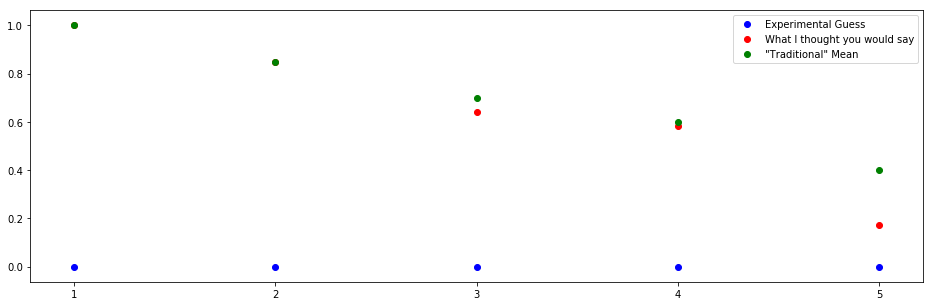

In [8]:
experiment['hidden_math'] = experiment[['m1','m2']].apply(secret_func,axis=1)
experiment['naive'] =experiment[['m1','m2']].mean(axis=1)
ind = np.arange(experiment.shape[0])+1
plt.figure(figsize=(16,5))
p_guess = plt.scatter(ind, experiment.overall, color="blue")
p_math = plt.scatter(ind,experiment.hidden_math, color="red")
p_naive = plt.scatter(ind,experiment.naive, color="green")
plt.xticks(ind)
plt.legend((p_guess,p_math,p_naive),('Experimental Guess','What I thought you would say', '"Traditional" Mean'))
plt.show()

## Mean Words

By default, when people say "mean", they often are referring to the _arithmetic mean_ which is the sum of samples divided by the number of samples, the type of mean we all know and love.

But really, there are multiple types of means. The Pythagorean means include:
* Arithmetic Mean (red line): default option. $\frac{1}{n} \sum^n_{i=1} x_n$
* Geometric Mean (blue line): good for data that grows exponentially. $\sqrt[n]{x_1 x_2 \dots x_n}$
* Harmonic Mean (pink line): good for rates. (This is what we did in our experiment!) $\frac{n}{\sum_{i=1}^n \frac{1}{x_i}}$

![Geographic Representation of Means](means.png "Geographic Representation of Means")

## Measures of Central Tendency

In addition to the _mean_, the traditional measures of central tendency include:
    
* median: the 50% percentile; the value that breaks your sorted data vector in half
* mode: the most common value in your data vector

## What's the deal with "Average"

This is actually a generic term that means "the most appropriate measure of central tendency". So it can really refer to the mean (any of them), the median, or the mode.

People _often_ use it as synonomous to "mean", which is _often_ used to mean the "arithmetic mean". So, it is a bit dangerous.

## Missing Data Mechanisms

* There are three types of missing data, in increasing order of analytic pain:
    * MCAR: Missing Completely At Random
    * MAR: Missing At Random
    * MNAR: Missing Not At Random
* The problem with missing data is _bias_. MNAR is especially problematic, but all mechanisms need to be handled.
* The _complete cases_ method removes any observation with missing data. This is only appropriate for MCAR data.
* For other mechanisms, complete cases handling will lead to bias, so _imputation_ of some form must be done. Far from "making up data", appropriate _imputation_ can significantly improve the accuracy of inferences.
* Naive approaches to missing data include "last value carried forward" and mean imputation, but these are generally not recommended. Multiple imputation is a popular method, with better theory behind it. You can read more about it [here](http://www.stefvanbuuren.nl/mi/mi.html).

## Normalization and Standardization

* The following definitions are fairly well-accepted, but both are terms used to describe _feature shifting & scaling_, so it is best to explicitly state the method:
    * _Normalization_ scales a numeric variable to be in the range from 0 to 1.
    * _Standardization_ scales a numeric variable to have mean 0 and variance 1.
* You can review some of the common methods [here](https://en.wikipedia.org/wiki/Feature_scaling)
* Also of note is this post by Andrew Gelman (Bayesian fame) discussing when standardization is appropriate for regression methods. [When to standardize regression inputs and when to leave them alone](http://andrewgelman.com/2009/07/11/when_to_standar/)

## Regularization

* _Regularization_ applies a penalty term within an algorithm to try to encourage computational tractability and prevent over-fitting. It is also sometimes referred to as _penalization_.
* There are main ways to conduct regularization, but two of the most common are:
    * LASSO (Least Absolute Shrinkage and Selection Operator): Uses an absolute value in the penalty term. This is the more popular option because (for mathy reasons) it can push a model coefficient to 0. That is, LASSO conducts both regularization and automatic _feature selection_.
    * Ridge: Uses a square in the penalty term. Will penalize all your model coefficients, but will not take any to 0 (i.e. it cannot do automatic _feature selection_.

![Missing Data Mechanisms](missing_data.png "Missing Data Mechanisms")